In [1]:
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import numpy as np

from algae_population import *

import matplotlib.pyplot as plt


SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

color_cycle = [
"#67001f",
"#b2182b",
"#d6604d",
"#f4a582",
"#fddbc7",
"#f7f7f7",
"#d1e5f0",
"#92c5de",
"#4393c3",
"#2166ac",
"#053061"
]

from matplotlib import cm
colors = cm.get_cmap('viridis',12) # 'viridis', 12)

# prop_cycle = plt.rcParams['axes.prop_cycle']
# colors = prop_cycle.by_key()['color']

# colormap = plt.cm.gist_ncar
cycler = plt.cycler('color',CB_color_cycle)
# cycler = plt.cycler('color', plt.cm.jet(np.linspace(0, 1, 12)))

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

In [2]:
import pickle
# pickle.dump(solutions_age, open('figure2a.p','wb'))
solutions_age = pickle.load(open('figure2a.p','rb'))

In [3]:
# import pickle
# pickle.dump(data,open('figure2b.p','wb'))

data = pickle.load(open('figure2b.p','rb'))

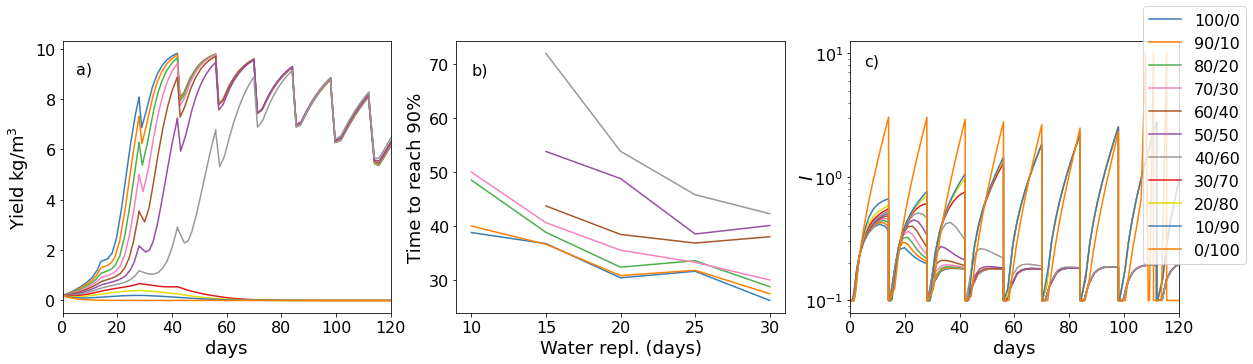

In [20]:
import math
fig,ax = plt.subplots(1,3, figsize=(20,5))
ax[0].set_prop_cycle(cycler)
ax[1].set_prop_cycle(cycler)
ax[2].set_prop_cycle(cycler)

for i, solution in enumerate(solutions_age):
    
    filename = solution[0]['s'][0].replace('/','-')
    # print(filename)
    t = np.hstack([s.t for s in solution])
    tmp = np.hstack([s.y for s in solution])
    yeeld = tmp[:-1,:].sum(axis=0)
    I = tmp[-1,:]/yeeld
    I = np.clip(I, 1e-1, 10.)


    ax[0].plot(t, yeeld,'-')#,color=colors[i]
    ax[2].semilogy(t, I,'-')#,color=viridis.colors[i,:])

# ax[1].set_yscale('log')
# ax[1].set_ylim([0,5])
ax[0].set_xlim([0, 120])
ax[2].set_xlim([0, 120])

# first axis
ax[0].set_xlabel('days')
ax[0].set_ylabel(r'Yield kg/m$^3$')
# second axis
ax[2].set_xlabel('days')
ax[2].set_ylabel(r'$I$')
ax[2].yaxis.set_label_coords(-0.1,.5)
# ax[0].text(10,9,solution[0]['s'][0])

# fig.savefig(f'{filename}_{replacement}_days.png')
# fig.savefig(filename+"_10days.svg")

ax[0].text(5,9,'a)')
ax[2].text(5,8,'c)')
ax[1].text(10, 68, 'b)')

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

replacements = [1, 5, 10, 15, 20, 25, 30]

# markers = ['o','s','^','>','<','v','h','+','x','D','1','2']
# fig, ax = plt.subplots(figsize=(12,12))

rr = []
for i in range(len(replacements)):
    t = []
    for j in range(len(scenarios)):
        ind = np.argmax(data[i][j]['revenue'] >= 9)
        if ind == 0:
            t.append(np.nan)
        else:
            t.append(data[i][j]['times'][ind])

    rr.append(t)

rr = np.array(rr)
for i in range(len(replacements)):
    ax[1].plot(replacements,rr[:,i],'-')#,color=colors[i,:])#, marker = markers[j], label=list(scenarios.items())[j][0])
        
# ax.set_yscale('log')
ax[2].legend(scenarios.keys(),loc='best',bbox_to_anchor=[1.23,0.15])
# fmt = mpl.ticker.StrMethodFormatter("{x:g}")
# ax.yaxis.set_major_formatter(fmt)
ax[1].set_xlabel(r'Water repl. (days)')
ax[1].set_ylabel(r'Time to reach 90%')# 1 kg/m$^3$')
ax[1].xaxis.set_major_locator(MultipleLocator(5))
ax[1].xaxis.set_major_formatter('{x:.0f}')
# ax[0].yaxis.set_minor_formatter(fmt)

# ax[1].yaxis.set_major_formatter(fmt)
# ax[1].yaxis.set_minor_formatter(fmt)
plt.show()
fig.savefig('figure2.png',dpi=300,bbox_inches='tight', 
               transparent=True,
               pad_inches=0)

In [21]:
rr

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [38.782, 40.000, 48.511, 50.000, nan, nan, nan, nan, nan, nan,
        nan],
       [36.734, 36.603, 38.820, 40.617, 43.721, 53.819, 72.017, nan, nan,
        nan, nan],
       [30.390, 30.803, 32.360, 35.505, 38.437, 48.793, 53.850, 80.000,
        nan, nan, nan],
       [31.599, 31.781, 33.557, 33.253, 36.839, 38.514, 45.804, 65.418,
        nan, nan, nan],
       [26.193, 27.436, 28.738, 30.000, 38.006, 40.089, 42.273, 52.380,
        nan, nan, nan]])